In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Specify the file path
file_path = "Merged_Aneurysm.csv"

# Load the CSV file into a Pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data has been loaded correctly
data


,case_id,patient_id,aneurysmLocation,aneurysmType,ruptureStatus,age,sex,multipleAneurysms,sacVolume,sacSurfaceArea,...,maxPressure,meanPressure,maxSpeed,meanSpeed,minTAWSS,maxTAWSS,meanTAWSS,minOSI,maxOSI,meanOSI
0,C0001,P0085,ICA,LAT,U,53,F,False,125.259604,120.453515,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C0002,P0112,ICA,LAT,U,35,F,False,119.002032,122.427263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C0003,P0115,ICA,TER,U,43,F,False,12.740609,23.480617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C0004,P0116,ICA,TER,U,60,F,True,9.376307,18.084625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C0005,P0118,ICA,LAT,R,26,F,False,37.934454,54.844592,...,7665.00,3722.280000,70.275319,13.193760,0.31251,176.440,20.908880,0.0,0.44672,0.001574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,C0095,P0270,BAS,TER,U,43,F,False,76.340708,75.181897,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,C0096,P0271,BAS,TER,R,67,M,False,436.828426,260.200509,...,765.53,346.252856,18.308317,3.402625,0.00777,22.004,4.918505,0.0,0.47207,0.011223
100,C0097,P0274,ICA,LAT,R,84,F,False,94.271201,100.528873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,C0098,P0286,MCA,TER,R,59,F,False,1022.481082,466.087643,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
print(f'{data.columns}\n {data.shape}')

characteristics = [f'{data.columns}']



Index(['case_id', 'patient_id', 'aneurysmLocation', 'aneurysmType',
       'ruptureStatus', 'age', 'sex', 'multipleAneurysms', 'sacVolume',
       'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 'sacSectionArea',
       'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 'ellipsoidMidSemiaxis',
       'ellipsoidMinSemiaxis', 'sacCenterlineLength', 'ostiumSectionArea',
       'ostiumSectionPerimeter', 'ostiumMinSize', 'ostiumMaxSize',
       'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star',
       'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'sacMinPressure',
       'sacMaxPressure', 'sacMeanPressure', 'sacMaxSpeed', 'sacMeanSpeed',
       'sacMinTAWSS', 'sacMaxTAWSS', 'sacMeanTAWSS', 'sacMinOSI', 'sacMaxOSI',
       'sacMeanOSI', 'vesselName', 'length', 'meanRadius', 'meanCurvature',
       'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 'maxCurvature',
       'maxTorsion', 'bifurcationAngleInPlane', 'bifurcationAngleOutOfPlane',
       'minPressure', 'maxPressure', '

In [3]:
data.dtypes

case_id              object
patient_id           object
aneurysmLocation     object
aneurysmType         object
ruptureStatus        object
                     ...   
maxTAWSS            float64
meanTAWSS           float64
minOSI              float64
maxOSI              float64
meanOSI             float64
Length: 62, dtype: object

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

# Specify the file path
file_path = "Merged_Aneurysm.csv"

# Load the CSV file into a Pandas DataFrame
data = pd.read_csv(file_path)

# Define the list of characteristics to be used including rupture status
characteristics_with_rupture = ['age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 
                                'sacSectionArea', 'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 
                                'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 'sacCenterlineLength', 
                                'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
                                'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 
                                'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 
                                'meanCurvature', 'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 
                                'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
                                'bifurcationAngleOutOfPlane', 'sex', 'multipleAneurysms', 
                                'aneurysmLocation', 'aneurysmType', 'ruptureStatus']

# Filter the data to include only the selected characteristics
data = data[characteristics_with_rupture]

# Convert numeric columns that are of object type to numeric
for col in ['age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 'sacSectionArea', 
            'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 
            'sacCenterlineLength', 'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
            'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 'vesselDiameter', 
            'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 'meanCurvature', 'meanTorsion', 'tortuosity', 
            'minRadius', 'maxRadius', 'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
            'bifurcationAngleOutOfPlane']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Convert categorical variables to numeric
for col in ['sex', 'multipleAneurysms', 'aneurysmLocation', 'aneurysmType', 'ruptureStatus']:
    data[col] = data[col].astype('category').cat.codes

# Handle missing values by filling them with a specific placeholder
data.fillna(-1, inplace=True)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2, the average silhouette_score is 0.6854908762843417
For n_clusters = 3, the average silhouette_score is 0.5359100418596376
For n_clusters = 4, the average silhouette_score is 0.5378168421531726
For n_clusters = 5, the average silhouette_score is 0.4999442171433185


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 6, the average silhouette_score is 0.4800043922479798
For n_clusters = 7, the average silhouette_score is 0.3167493561550959
For n_clusters = 8, the average silhouette_score is 0.3434097174791286


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 9, the average silhouette_score is 0.3484512665983928
For n_clusters = 10, the average silhouette_score is 0.33100327149546566


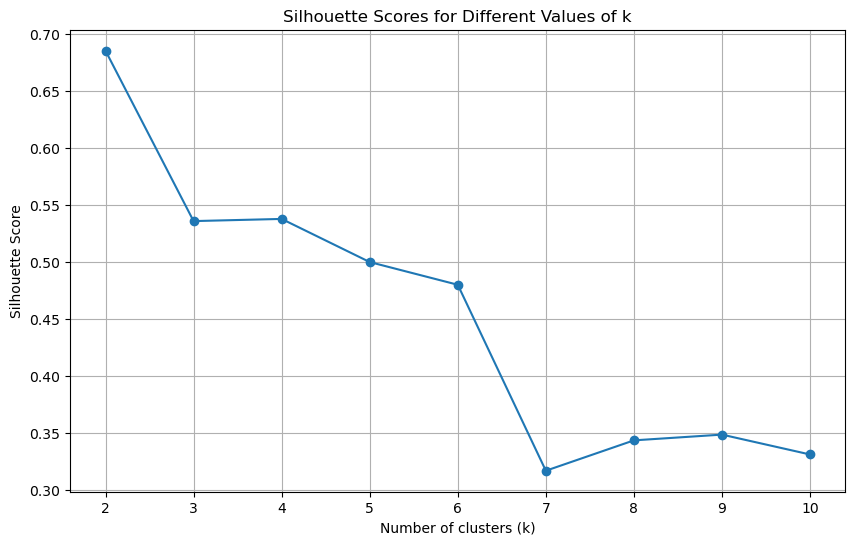

In [5]:
import pandas as pd
import numpy as np


# Define the range of k values to evaluate
k_values = range(2, 11)

# Initialize a list to store silhouette scores
silhouette_scores = []

# Calculate silhouette scores for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the average silhouette_score is {silhouette_avg}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score (t-SNE Directly): 0.6088211536407471


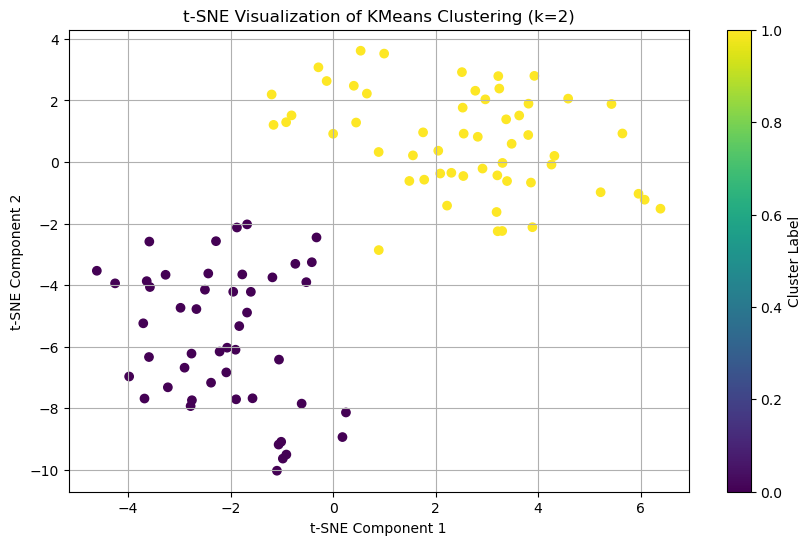

In [6]:
from sklearn.manifold import TSNE

# Apply t-SNE directly on scaled data
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

# Reapply KMeans clustering
kmeans_tsne = KMeans(n_clusters=2, random_state=42)
clusters_tsne = kmeans_tsne.fit_predict(tsne_results)

# Compute silhouette score on t-SNE results
silhouette_tsne = silhouette_score(tsne_results, clusters_tsne)
print(f'Silhouette Score (t-SNE Directly): {silhouette_tsne}')

# Plot the t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters_tsne, cmap='viridis', marker='o')
plt.title('t-SNE Visualization of KMeans Clustering (k=2)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()
